# FEATURE SELECTION
<hr style="height:1px;border:none;color:#333;background-color:#333;" />
<br>

In [338]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2579 entries, 0 to 2578
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   GrLivArea      2579 non-null   int64  
 1   SalePrice      2579 non-null   int64  
 2   MSSubClass     2579 non-null   int64  
 3   MSZoning       2579 non-null   float64
 4   LotFrontage    2579 non-null   float64
 5   LotArea        2579 non-null   int64  
 6   Street         2579 non-null   float64
 7   Alley          2579 non-null   float64
 8   LotShape       2579 non-null   float64
 9   LandContour    2579 non-null   float64
 10  Utilities      2579 non-null   float64
 11  LotConfig      2579 non-null   float64
 12  LandSlope      2579 non-null   float64
 13  Neighborhood   2579 non-null   float64
 14  Condition1     2579 non-null   float64
 15  Condition2     2579 non-null   float64
 16  BldgType       2579 non-null   float64
 17  HouseStyle     2579 non-null   float64
 18  OverallQ

In [289]:
# import modules
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


import warnings
warnings.filterwarnings("ignore")

from sklearn.model_selection import train_test_split

from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from sklearn.feature_selection import SelectKBest, chi2, SelectFromModel, f_classif, mutual_info_classif
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

In [170]:
pd.set_option('display.max_columns', None) # display all the columns of a dataframe
pd.set_option('display.max_rows', 100)     # display 100 rows of a dataframe

In [57]:
# Load cleaned data - see "Data Cleansing.ipynb"
dataset = pd.read_csv('../ariel/Ames_Housing_Price_Data_cleaned.csv')

In [59]:
dataset.select_dtypes(exclude="number").head()

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,RL,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,SWISU,Norm,Norm,1Fam,1Story,Gable,CompShg,Wd Sdng,Wd Sdng,None,TA,TA,CBlock,TA,TA,No,Rec,Unf,GasA,TA,Y,SBrkr,TA,Typ,Gd,Detchd,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Normal
1,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Edwards,Norm,Norm,TwnhsE,1Story,Gable,CompShg,HdBoard,HdBoard,BrkFace,Gd,TA,CBlock,Gd,TA,Mn,GLQ,ALQ,GasA,TA,Y,SBrkr,Gd,Typ,NaN,Attchd,Fin,TA,TA,Y,NaN,NaN,NaN,WD,Normal
2,C (all),Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,IDOTRR,Norm,Norm,1Fam,1Story,Hip,CompShg,MetalSd,MetalSd,None,Gd,TA,BrkTil,TA,TA,No,ALQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,NaN,Detchd,Unf,TA,Po,N,NaN,NaN,NaN,WD,Normal
3,RL,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,OldTown,Norm,Norm,1Fam,2Story,Gable,CompShg,MetalSd,MetalSd,None,Gd,Gd,BrkTil,Fa,TA,No,Unf,Unf,GasA,Gd,Y,SBrkr,TA,Typ,NaN,Detchd,Unf,TA,TA,N,NaN,NaN,NaN,WD,Normal
4,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,None,Gd,TA,PConc,Gd,TA,No,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,NaN,Attchd,Fin,TA,TA,Y,NaN,NaN,NaN,WD,Normal


<br><br>
## Encoding Categorical Features
<hr style="height:1px;border:none;color:#333;background-color:#333;" />

In [ ]:
# set the following columns to object
dataset['MSSubClass'] = dataset['MSSubClass'].astype(object)
dataset['YearBuilt'] = dataset['YearBuilt'].astype(object)
dataset['YearRemodAdd'] = dataset['YearRemodAdd'].astype(object)
dataset['GarageYrBlt'] = dataset['GarageYrBlt'].astype(object)
dataset['MoSold'] = dataset['MoSold'].astype(object)
dataset['YrSold'] = dataset['YrSold'].astype(object)

In [328]:
# NaN values have a meaning
temp = pd.DataFrame(dataset.isna().sum())
temp[temp[0]>0].sort_values(0, ascending=False)

,0


In [ ]:
# filling all NaNs with "NA"
dataset.fillna("NA", inplace=True)
# converting "NA" to zero in the GarageYrBlt column
dataset['GarageYrBlt'][dataset['GarageYrBlt']=="NA"]# = 0

In [ ]:
# Encode all categorical variables
label_encoder = LabelEncoder()
for column_name in dataset.select_dtypes(include="object").columns:
    dataset[column_name] = label_encoder.fit_transform(dataset[column_name]).astype('float64') # Fit label encoder and return encoded labels

<br><br>
## Eliminating Highly Correlated Features
<hr style="height:1px;border:none;color:#333;background-color:#333;" />

In [279]:
# Generate correlation matrix
corr_matrix = dataset.corr(method="pearson") # pearson? kendall? which is best

In [281]:
# features with correlation higher than 0.7
temp = corr_matrix[(corr_matrix>0.7) & (corr_matrix<1.0)].drop('SalePrice').drop('SalePrice', axis=1)
temp2 = temp[temp[temp.isna().any(axis=1)].sum()>0]
temp2[temp2.index]

,GrLivArea,MSSubClass,BldgType,YearBuilt,Exterior1st,Exterior2nd,TotalBsmtSF,1stFlrSF,TotRmsAbvGrd,GarageYrBlt,GarageCars,GarageArea
GrLivArea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.807432,NaN,NaN,NaN
MSSubClass,NaN,NaN,0.747653,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
BldgType,NaN,0.747653,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
YearBuilt,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.782847,NaN,NaN
Exterior1st,NaN,NaN,NaN,NaN,NaN,0.86023,NaN,NaN,NaN,NaN,NaN,NaN
Exterior2nd,NaN,NaN,NaN,NaN,0.86023,NaN,NaN,NaN,NaN,NaN,NaN,NaN
TotalBsmtSF,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.78428,NaN,NaN,NaN,NaN
1stFlrSF,NaN,NaN,NaN,NaN,NaN,NaN,0.78428,NaN,NaN,NaN,NaN,NaN
TotRmsAbvGrd,0.807432,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
GarageYrBlt,NaN,NaN,NaN,0.782847,NaN,NaN,NaN,NaN,NaN,NaN,0.70180,NaN


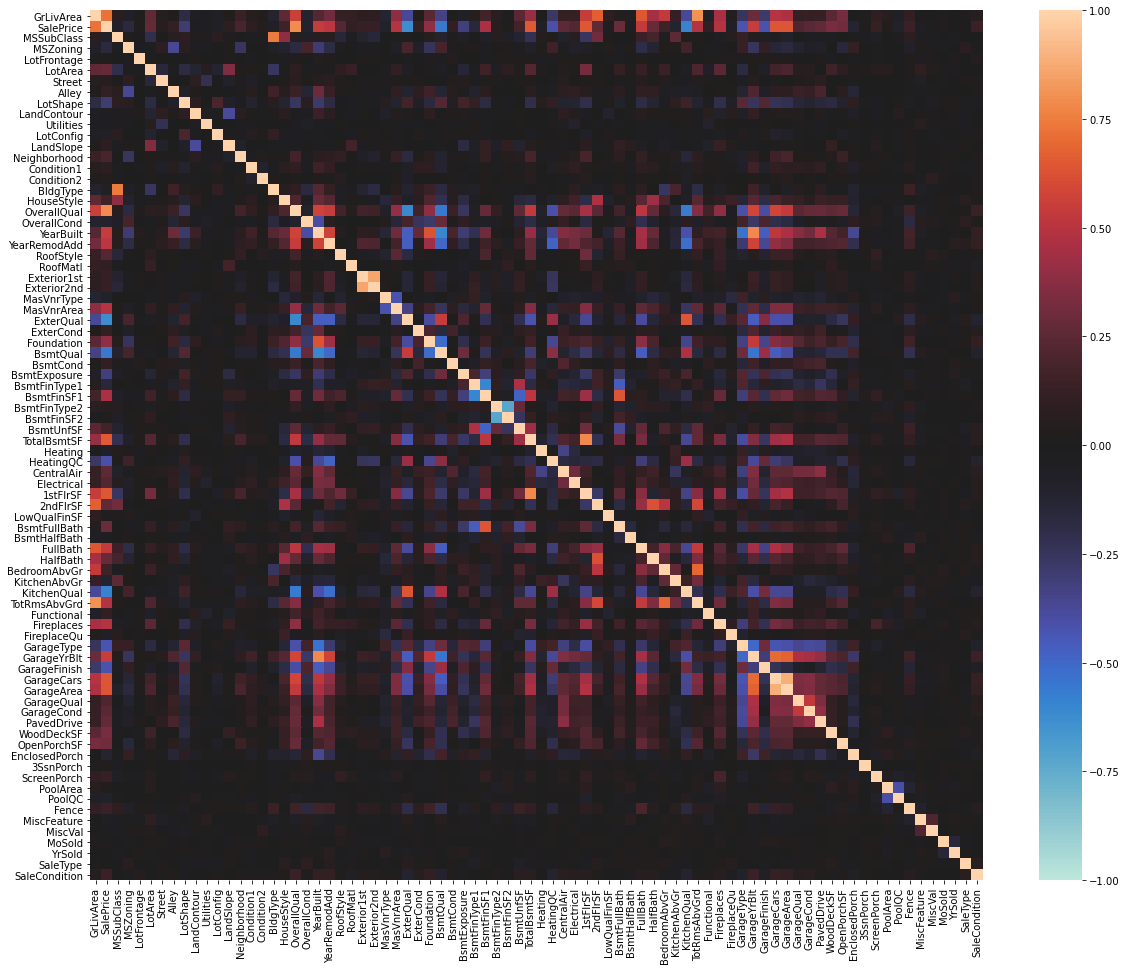

In [282]:
# plot the correlation matrix (note: not all of the features fit the plot)
fig=plt.figure(figsize=(20,16))
sns.heatmap(corr_matrix, vmin=-1, vmax=1, center= 0)

<br><br>
## Top 20 Features - Correlation Between Target and Feature
<hr style="height:1px;border:none;color:#333;background-color:#333;" />

In [329]:
# Return the top n features using the correlation between target and feature
abs(correlation['SalePrice']).sort_values(ascending=False)#.head(21)#.index[1:21]

SalePrice        1.000000
OverallQual      0.790661
GrLivArea        0.719980
TotalBsmtSF      0.652540
1stFlrSF         0.642623
GarageCars       0.638640
GarageArea       0.634706
ExterQual        0.629883
KitchenQual      0.591740
BsmtQual         0.554034
GarageYrBlt      0.547615
YearBuilt        0.544569
FullBath         0.535175
YearRemodAdd     0.514720
MasVnrArea       0.498513
TotRmsAbvGrd     0.490206
Fireplaces       0.488173
BsmtFinSF1       0.461056
GarageType       0.424560
GarageFinish     0.421115
HeatingQC        0.411771
Foundation       0.396264
WoodDeckSF       0.333332
BsmtExposure     0.312805
OpenPorchSF      0.306629
LotShape         0.295613
BsmtFullBath     0.290867
HalfBath         0.285861
LotArea          0.274427
PavedDrive       0.268309
2ndFlrSF         0.263115
CentralAir       0.257721
GarageCond       0.245567
RoofStyle        0.226828
Electrical       0.225192
GarageQual       0.215536
Neighborhood     0.190225
BsmtUnfSF        0.168118
HouseStyle  

<br><br>
## Using Chi-squared to Select Features
<hr style="height:1px;border:none;color:#333;background-color:#333;" />
Note: Since the target value is continues, does this method of feature selection is good in this case? All the categorical variables were encoded but is that enough to yield good results?

In [207]:
X = dataset.drop('SalePrice',axis=1) # features
y = dataset['SalePrice'] # target

In [330]:
num_f = 40                                    # Number of features to select
X_norm = MinMaxScaler().fit_transform(X)      # Transform features by scaling each feature to a given range.
chi_selector = SelectKBest(chi2, k=num_f)     # Create selector: Select features according to the k highest scores.
chi_selector.fit(X_norm, y)                   # Run score function on (X,y) and get appropriate features.
chi_support = chi_selector.get_support()      # Get a mask, or integer index, of the features selected.
chi_features = X.loc[:,chi_support].columns.tolist()  # Get list of selected features

In [331]:
chi_features

['MSSubClass',
 'LotShape',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'BldgType',
 'HouseStyle',
 'YearBuilt',
 'YearRemodAdd',
 'RoofMatl',
 'MasVnrArea',
 'ExterQual',
 'BsmtQual',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'HeatingQC',
 '2ndFlrSF',
 'LowQualFinSF',
 'BsmtFullBath',
 'BsmtHalfBath',
 'HalfBath',
 'KitchenQual',
 'Fireplaces',
 'GarageType',
 'GarageYrBlt',
 'GarageFinish',
 'GarageCars',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'YrSold']

<br><br>
## Using Lasso Regression to Select Features
<hr style="height:1px;border:none;color:#333;background-color:#333;" />

In [332]:
num_f = 40 # number of features to select
# SelectFromModel -> Meta-transformer for selecting features based on importance weights.
embeded_lr_selector = SelectFromModel(LogisticRegression(penalty="l1", solver='liblinear'), max_features=num_f)
# Penalty="l1" -> indicates regularization using L1
embeded_lr_selector.fit(X_norm, y) # Fit the SelectFromModel meta-transformer.

embeded_lr_support = embeded_lr_selector.get_support() # Get a mask, or integer index, of the features selected
embeded_lr_feature = X.loc[:,embeded_lr_support].columns.tolist() # List of features
print(str(len(embeded_lr_feature)), 'selected features')

40 selected features


In [333]:
embeded_lr_feature

['MSZoning',
 'Street',
 'LotShape',
 'LandContour',
 'LotConfig',
 'Neighborhood',
 'BldgType',
 'HouseStyle',
 'OverallQual',
 'YearBuilt',
 'YearRemodAdd',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'FullBath',
 'HalfBath',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageYrBlt',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'Fence',
 'MoSold',
 'YrSold',
 'SaleType',
 'SaleCondition']

<br><br>
## Using Random Forest to Select Features
<hr style="height:1px;border:none;color:#333;background-color:#333;" />

In [334]:
from sklearn.ensemble import RandomForestClassifier
num_f = 40 # number of features to select
# SelectFromModel -> Meta-transformer for selecting features based on importance weights.
embeded_rf_selector = SelectFromModel(RandomForestClassifier(n_estimators=100), max_features=num_f)
# n_estimators -> The number of trees in the forest.
embeded_rf_selector.fit(X, y) # Fit the SelectFromModel meta-transformer.

embeded_rf_support = embeded_rf_selector.get_support() # Get a mask, or integer index, of the features selected
embeded_rf_feature = X.loc[:,embeded_rf_support].columns.tolist() # List of features
print(str(len(embeded_rf_feature)), 'selected features')

26 selected features


In [335]:
embeded_rf_feature

['GrLivArea',
 'LotFrontage',
 'LotArea',
 'Neighborhood',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrArea',
 'BsmtFinType1',
 'BsmtFinSF1',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'BedroomAbvGr',
 'TotRmsAbvGrd',
 'FireplaceQu',
 'GarageYrBlt',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'MoSold',
 'YrSold']

<br><br>
## Using F Test to Select Features
<hr style="height:1px;border:none;color:#333;background-color:#333;" />
Note: Categorical variables have been encoded, is that enough?

In [336]:
value_f, p_f = f_classif(X_norm, y)
pd.Series(p_f, index=X.columns).sort_values().head(40)

OverallQual     3.640980e-271
GrLivArea       2.544883e-177
Street          1.161482e-171
ExterQual       3.977760e-150
1stFlrSF        1.045746e-112
TotalBsmtSF     3.097936e-111
GarageCars      5.613187e-107
GarageArea       1.012057e-98
FullBath         9.895901e-88
YearBuilt        3.198863e-82
KitchenQual      1.176853e-78
GarageYrBlt      1.060503e-77
MasVnrArea       1.407854e-66
BsmtQual         1.285422e-65
Condition2       1.458450e-54
LotArea          3.135413e-50
YearRemodAdd     1.125181e-49
BsmtFinSF1       5.502965e-48
Utilities        3.203043e-42
TotRmsAbvGrd     6.919798e-39
CentralAir       1.371121e-38
GarageType       3.097812e-33
GarageFinish     5.761077e-30
Fireplaces       7.020478e-29
MSZoning         4.802462e-25
PavedDrive       3.093518e-21
Foundation       3.491065e-21
2ndFlrSF         1.029868e-15
GarageCond       4.212570e-13
RoofMatl         8.289425e-13
HeatingQC        1.742898e-12
LotShape         1.180544e-11
Heating          1.545307e-11
WoodDeckSF

<br><br>
## Using Mutual Information to Select Features
<hr style="height:1px;border:none;color:#333;background-color:#333;" />

In [326]:
mutual_scores = mutual_info_classif(X_norm, y)
pd.Series(mutual_scores, index=X.columns).sort_values(ascending=False)

Street           2.913278
MiscFeature      2.638525
SaleType         2.520017
Functional       2.430466
CentralAir       2.400599
Alley            2.368144
Electrical       2.344635
KitchenAbvGr     2.340821
GarageCond       2.288948
LandContour      2.285124
GarageQual       2.249480
BsmtCond         2.226046
Condition1       2.220337
PavedDrive       2.203577
Condition2       2.144201
ExterCond        2.094748
Heating          2.049955
SaleCondition    2.034714
BsmtFinType2     1.938199
FullBath         1.849549
Fence            1.803287
ExterQual        1.708581
MSZoning         1.696119
KitchenQual      1.499920
RoofStyle        1.358972
GarageCars       1.317078
GarageType       1.274130
LotConfig        1.259435
BsmtQual         1.196809
BsmtExposure     1.145280
MasVnrType       1.063341
Foundation       1.038312
LotShape         0.997751
PoolQC           0.925429
FireplaceQu      0.916945
OverallQual      0.877785
GarageFinish     0.865945
OverallCond      0.837387
BedroomAbvGr

In [322]:
X.iloc[:,:]

,GrLivArea,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,856,30,5.0,42.0,7890,1.0,1.0,3.0,3.0,0.0,0.0,0.0,21.0,2.0,2.0,0.0,2.0,6,6,1939,1950,1.0,0.0,13.0,14.0,2.0,0.0,3.0,4.0,1.0,5.0,5.0,4.0,5.0,238.0,6.0,0.0,618.0,856.0,1.0,4.0,1.0,3.0,856,0,0,1.0,0.0,1,0,2,1,4.0,4,6.0,1,2.0,5.0,30.0,3.0,2.0,399.0,5.0,5.0,2.0,0,0,0,0,166,0,3.0,4.0,1.0,0,3,2010,9.0,4.0
1,1049,120,5.0,60.0,4235,1.0,1.0,3.0,3.0,0.0,4.0,0.0,7.0,2.0,2.0,4.0,2.0,5,5,1984,1984,1.0,0.0,6.0,6.0,1.0,149.0,2.0,4.0,1.0,2.0,5.0,2.0,2.0,552.0,0.0,393.0,104.0,1049.0,1.0,4.0,1.0,3.0,1049,0,0,1.0,0.0,2,0,2,1,2.0,5,6.0,0,3.0,1.0,74.0,0.0,1.0,266.0,5.0,5.0,2.0,0,105,0,0,0,0,3.0,4.0,1.0,0,2,2009,9.0,4.0
2,1001,30,1.0,80.0,6060,1.0,1.0,3.0,3.0,0.0,4.0,0.0,11.0,2.0,2.0,0.0,2.0,5,9,1930,2007,3.0,0.0,8.0,8.0,2.0,0.0,2.0,4.0,0.0,5.0,5.0,4.0,0.0,737.0,6.0,0.0,100.0,837.0,1.0,0.0,1.0,3.0,1001,0,0,0.0,0.0,1,0,2,1,2.0,5,6.0,0,3.0,5.0,21.0,3.0,1.0,216.0,5.0,4.0,0.0,154,0,42,86,0,0,3.0,4.0,1.0,0,11,2007,9.0,4.0
3,1039,70,5.0,70.0,8146,1.0,1.0,3.0,3.0,0.0,0.0,0.0,20.0,2.0,2.0,0.0,5.0,4,8,1900,2003,1.0,0.0,8.0,8.0,2.0,0.0,2.0,2.0,0.0,1.0,5.0,4.0,6.0,0.0,6.0,0.0,405.0,405.0,1.0,2.0,1.0,3.0,717,322,0,0.0,0.0,1,0,2,1,4.0,6,6.0,0,3.0,5.0,31.0,3.0,1.0,281.0,5.0,5.0,0.0,0,0,168,0,111,0,3.0,4.0,1.0,0,5,2009,9.0,4.0
4,1665,60,5.0,64.0,8400,1.0,1.0,3.0,3.0,0.0,4.0,0.0,17.0,2.0,2.0,0.0,5.0,8,6,2001,2001,1.0,0.0,12.0,13.0,2.0,0.0,2.0,4.0,2.0,2.0,5.0,4.0,2.0,643.0,6.0,0.0,167.0,810.0,1.0,0.0,1.0,3.0,810,855,0,1.0,0.0,2,1,3,1,2.0,6,6.0,0,3.0,1.0,91.0,0.0,2.0,528.0,5.0,5.0,2.0,0,45,0,0,0,0,3.0,4.0,1.0,0,11,2009,9.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2574,952,30,5.0,68.0,8854,1.0,1.0,3.0,3.0,0.0,4.0,0.0,3.0,2.0,2.0,0.0,1.0,6,6,1916,1950,1.0,0.0,13.0,14.0,2.0,0.0,3.0,4.0,0.0,5.0,5.0,4.0,6.0,0.0,6.0,0.0,952.0,952.0,3.0,1.0,0.0,1.0,952,0,0,0.0,0.0,1,0,2,1,1.0,4,6.0,1,2.0,5.0,8.0,3.0,1.0,192.0,1.0,4.0,1.0,0,98,0,0,40,0,3.0,4.0,1.0,0,5,2009,9.0,4.0
2575,1733,20,5.0,79.0,13680,1.0,1.0,0.0,3.0,0.0,1.0,0.0,7.0,2.0,2.0,0.0,2.0,3,5,1955,1955,3.0,0.0,3.0,14.0,2.0,0.0,3.0,4.0,3.0,3.0,3.0,3.0,4.0,0.0,4.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1733,0,0,0.0,0.0,2,0,4,1,4.0,8,3.0,1,2.0,1.0,45.0,3.0,2.0,452.0,5.0,5.0,2.0,0,0,0,0,0,0,3.0,4.0,1.0,0,6,2009,9.0,4.0
2576,2002,90,4.0,50.0,6270,1.0,1.0,3.0,1.0,0.0,4.0,0.0,6.0,2.0,2.0,2.0,5.0,5,6,1949,1950,1.0,0.0,8.0,8.0,2.0,0.0,3.0,4.0,1.0,5.0,5.0,4.0,1.0,284.0,6.0,0.0,717.0,1001.0,1.0,4.0,0.0,0.0,1001,1001,0,0.0,0.0,2,0,4,2,4.0,8,6.0,0,3.0,0.0,39.0,3.0,3.0,871.0,5.0,5.0,2.0,0,0,0,0,0,0,3.0,4.0,1.0,0,8,2007,9.0,4.0
2577,1842,60,5.0,65.0,8826,1.0,1.0,3.0,3.0,0.0,4.0,0.0,5.0,2.0,2.0,0.0,5.0,7,5,2000,2000,1.0,0.0,12.0,13.0,1.0,144.0,2.0,4.0,2.0,2.0,5.0,4.0,2.0,841.0,6.0,0.0,144.0,985.0,1.0,0.0,1.0,3.0,985,857,0,1.0,0.0,2,1,3,1,2.0,7,6.0,1,5.0,1.0,90.0,0.0,2.0,486.0,5.0,5.0,2.0,193,96,0,0,0,0,3.0,4.0,1.0,0,7,2007,9.0,4.0
